In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics 
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

In [2]:
from google.colab import files
uploaded=files.upload()

Saving weather.csv to weather.csv


In [3]:
data = pd.read_csv("weather.csv")

In [4]:
data = pd.read_csv("weather.csv")
data.head()

In [5]:
data.describe() 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [7]:
data.shape

(366, 22)

In [8]:
data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics 
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

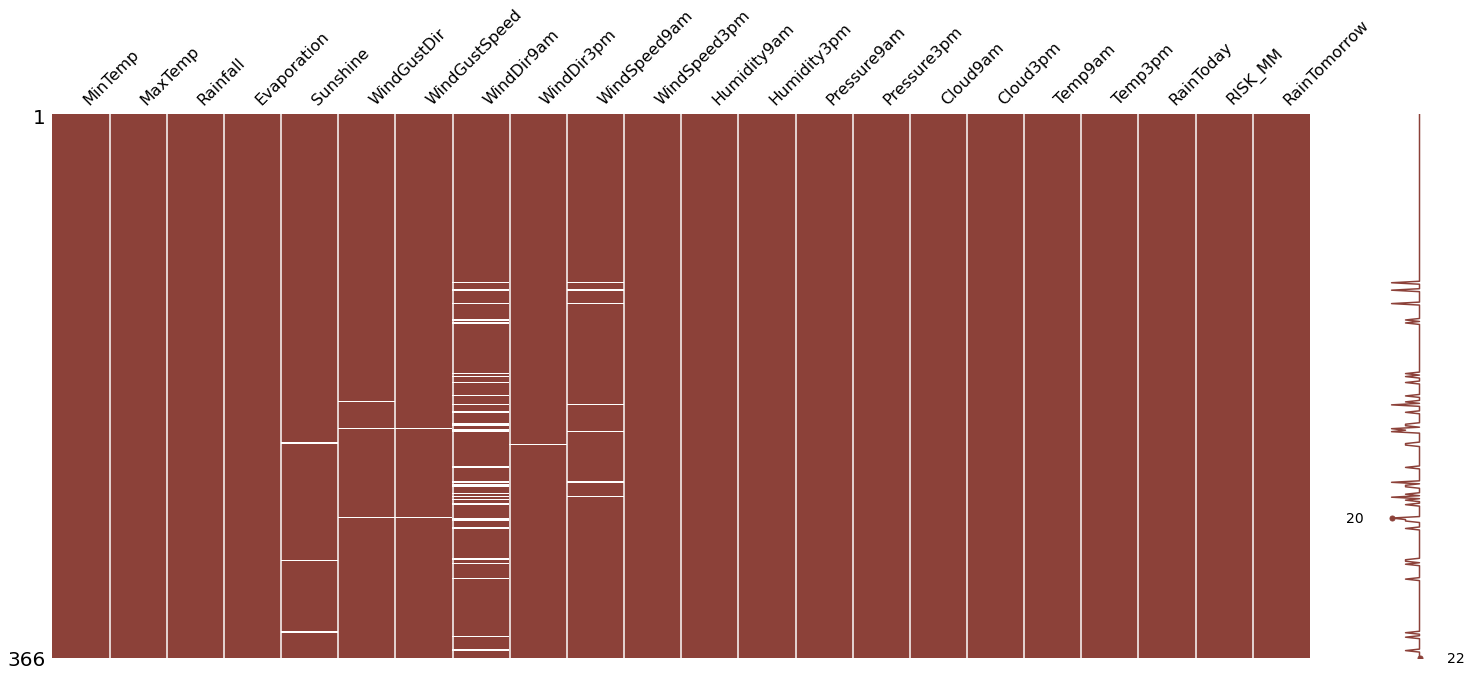

In [13]:
import missingno as msno 
msno.matrix(data, color= (0.55, 0.255, 0.225), fontsize=16)

In [14]:
data_cat = data[['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']] 
data.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'] ,axis=1, inplace=True)
data.drop(columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'] ,axis=1, inplace=True)

In [15]:
data['MinTemp'].fillna (data['MinTemp'].mean(), inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(), inplace=True)
data['Rainfall'].fillna (data['Rainfall'].mean(), inplace=True)
data['WindGustSpeed'].fillna (data['WindGustSpeed'].mean(), inplace=True) 
data['WindSpeed9am'].fillna (data['WindSpeed9am'].mean(), inplace=True)
data['WindSpeed3pm' ].fillna (data['WindSpeed3pm'].mean(), inplace=True)
data['Humidity9am'].fillna (data['Humidity9am'].mean(), inplace=True) 
data['Humidity3pm'].fillna (data['Humidity3pm'].mean(), inplace=True)
data['Pressure9am' ].fillna (data['Pressure9am'].mean(), inplace=True) 
data['Pressure3pm' ].fillna (data[ 'Pressure3pm'].mean(), inplace=True)
data['Temp9am'].fillna (data['Temp9am']. mean(), inplace=True)
data['Temp3pm' ].fillna(data['Temp3pm'].mean(), inplace=True)

In [19]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035711,0.218020,0.127542,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.452064,0.109672,-0.216814,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.150990,0.096190,0.219637,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.318025,0.288477,0.068929,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.035711,0.452064,-0.150990,0.318025,1.000000,0.095843,-0.064522,0.072573,-0.499017,-0.759429,0.006276,-0.036201,-0.681092,-0.661131,0.219509,0.470447,-0.378823
WindGustSpeed,0.218020,0.109672,0.096190,0.288477,0.095843,1.000000,0.527653,0.693945,-0.349793,-0.069439,-0.540180,-0.526885,-0.012666,0.050230,0.256223,0.072501,0.251991
WindSpeed9am,0.127542,-0.216814,0.219637,0.068929,-0.064522,0.527653,1.000000,0.472966,-0.270623,0.146657,-0.356332,-0.247952,0.101842,-0.022471,0.064074,-0.235186,0.039091
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072573,0.693945,0.472966,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.499017,-0.349793,-0.270623,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.759429,-0.069439,0.146657,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


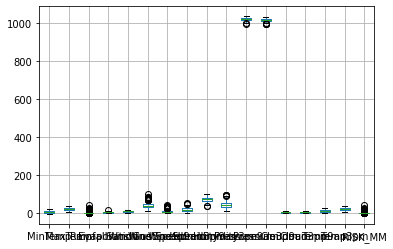

In [23]:
data.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


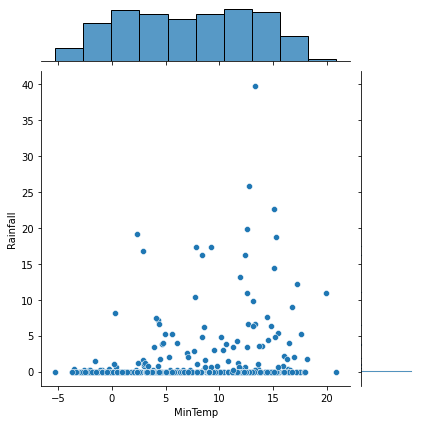

In [24]:
sns.jointplot(data['MinTemp'],data['Rainfall'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


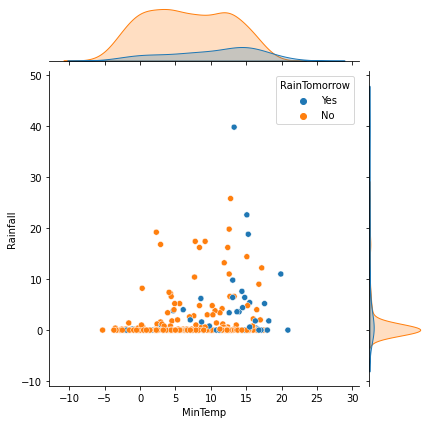

In [25]:
sns.jointplot(data['MinTemp'],data['Rainfall'],hue=data['RainTomorrow'])

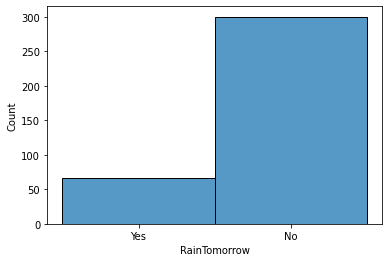

In [26]:
sns.histplot(data['RainTomorrow'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


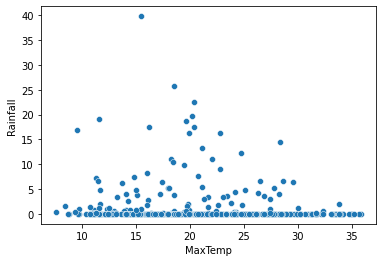

In [27]:
sns.scatterplot(data['MaxTemp'],data['Rainfall'])

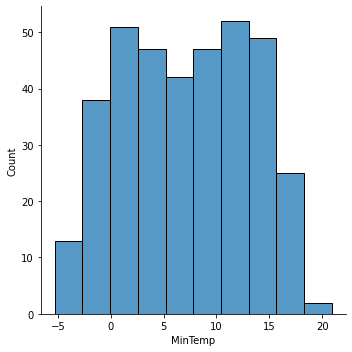

In [28]:
sns.displot(data['MinTemp'])

In [29]:
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)
print(" X-values:")
print(x)
print("Y-values:")
print(y)

 X-values:
     MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0        8.0     24.3       0.0          3.4       6.3           30.0   
1       14.0     26.9       3.6          4.4       9.7           39.0   
2       13.7     23.4       3.6          5.8       3.3           85.0   
3       13.3     15.5      39.8          7.2       9.1           54.0   
4        7.6     16.1       2.8          5.6      10.6           50.0   
..       ...      ...       ...          ...       ...            ...   
361      9.0     30.7       0.0          7.6      12.1           76.0   
362      7.1     28.4       0.0         11.6      12.7           48.0   
363     12.5     19.9       0.0          8.4       5.3           43.0   
364     12.5     26.9       0.0          5.0       7.1           46.0   
365     12.3     30.2       0.0          6.0      12.6           78.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0             6.0            20       

In [33]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y, test_size=0.2, random_state =0)
print("Train set:")
print(x_train,y_train)
print("Test set:")
print(x_test,y_test)

Train set:
[[ 1.43487111  0.42651837 -0.33848522 ...  1.21667552  0.46282635
  -0.33848522]
 [-1.00797857 -0.68103902 -0.33848522 ... -1.0418513  -0.69833916
  -0.33848522]
 [-1.19077684 -0.57627007 -0.33848522 ... -0.5972594  -0.65309895
  -0.33848522]
 ...
 [ 0.95294839  1.14493397 -0.33848522 ...  0.89656936  1.17158971
  -0.33848522]
 [ 0.03895701  0.05234358 -0.33848522 ...  0.52311217  0.08582456
  -0.33848522]
 [-0.80856227  0.0074426  -0.33848522 ... -0.31272059  0.08582456
  -0.33848522]] 63      No
241     No
306     No
317    Yes
245     No
      ... 
323     No
192     No
117     No
47      No
172     No
Name: RainTomorrow, Length: 292, dtype: object
Test set:
[[ 0.58735184  0.69592422 -0.33848522 ...  0.46976114  0.76442778
  -0.33848522]
 [-1.50651932 -1.35455364 -0.33848522 ... -1.96660243 -1.24122174
  -0.33848522]
 [ 1.36839901  0.08227756  0.94112876 ...  0.75429995  0.1159847
  -0.00673345]
 ...
 [ 0.18851924 -0.66607202 -0.33848522 ...  0.22078968 -0.60785873
  -0.3

In [34]:
import sklearn
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = sklearn.ensemble. RandomForestClassifier()
svm=sklearn.svm.SVC()
Dtree=sklearn.tree. DecisionTreeClassifier()
GBM = sklearn.ensemble. GradientBoostingClassifier()
log=sklearn.linear_model.LogisticRegression()